In [88]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [89]:
dots_one = np.random.normal(100, size = (100, 2), scale=10)
dots_two = np.random.normal(70, size = (100, 2), scale=10)

dat_1 = np.concatenate((dots_one, np.ones((dots_one.shape[0], 1), dtype=np.float64)), axis=1)
dat_0 = np.concatenate((dots_two, np.ones((dots_one.shape[0], 1), dtype=np.float64)), axis=1)
dat = np.concatenate((dat_0, dat_1))

/home/maximus/anaconda3/envs/cs/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


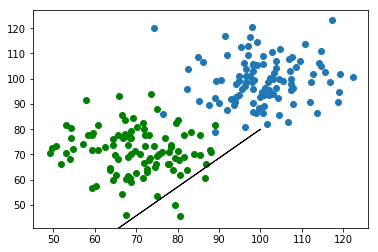

In [96]:
def draw(arr1, arr2):
    plt.scatter(arr1[:, 0], arr1[:, 1])
    plt.scatter(arr2[:, 0], arr2[:, 1], color='green')

def arrow(x1, y1, x2, y2, plt):
    ax = plt.axes()
    ax.arrow(x1, y1, x2, y2, head_width=0.05, head_length=0.1, fc='k', ec='k')

sx, sy = 100, 80
draw(dots_one, dots_two)
d = w_mse.detach().numpy()*1e3
arrow(sx, sy, sx + d[0][0], sy + d[1][0], plt)

In [90]:
def sigmoida(x):
    return 1 / (1 + torch.exp(x))

In [91]:
dat_torch = torch.from_numpy(dat[:, 0:2]).double()
target_torch = torch.from_numpy(dat[:, 2]).double().reshape((-1, 1))

In [92]:
w_mse = torch.tensor([[1], [1]], dtype=torch.float64, requires_grad=True).double()
w_logloss = torch.tensor([[1, 1]], dtype=torch.float64)

z_mse = dat_torch.mm(w_mse) - target_torch
goal_mse = z_mse.pow(2).sum()
goal_mse.backward()
gamma = 1e-6

t = 100
while t > 0:
    t -= 1
    z_mse = dat_torch.mm(w_mse) - target_torch
    goal_mse = z_mse.pow(2).sum() / z_mse.shape[0]
    goal_mse.backward()

    with torch.no_grad():
        w_mse -= gamma * w_mse.grad
        w_mse.grad.zero_()

In [93]:
w_mse

tensor([[-0.2395],
        [-0.2360]], dtype=torch.float64)